In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timezone
import random
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import time
import datetime
import pickle
import gc
from tqdm import tqdm

In [4]:
df = pd.read_csv("banks")

In [5]:
df

,timestamp,Close_0,Close_1,Close_2,Close_3,Close_4,Target_0,Target_1,Target_2,Target_3,...,log_close/mean_1800-mean_close/mean_1800_id0,log_return_1800-mean_log_returns_1800_id0,log_close/mean_1800-mean_close/mean_1800_id1,log_return_1800-mean_log_returns_1800_id1,log_close/mean_1800-mean_close/mean_1800_id2,log_return_1800-mean_log_returns_1800_id2,log_close/mean_1800-mean_close/mean_1800_id3,log_return_1800-mean_log_returns_1800_id3,log_close/mean_1800-mean_close/mean_1800_id4,log_return_1800-mean_log_returns_1800_id4
0,1673508600,16.410000,10.35,10.66,24.440001,8.87,0.020000,0.02,0.010000,0.039999,...,0.221837,0.031387,-0.239068,-0.087854,-0.209556,0.015579,0.620167,0.048714,-0.393380,-0.007826
1,1673508660,16.430000,10.37,10.67,24.480000,8.88,0.039999,0.02,0.030000,0.060001,...,0.221685,0.032808,-0.238507,-0.087447,-0.209988,0.013251,0.620432,0.049612,-0.393622,-0.008223
2,1673508720,16.469999,10.39,10.70,24.540001,8.90,-0.010000,0.02,-0.020000,0.000000,...,0.221744,0.031758,-0.238953,-0.088192,-0.209553,0.013448,0.620508,0.049366,-0.393746,-0.006380
3,1673508780,16.459999,10.41,10.68,24.540001,8.88,0.050001,0.02,0.040000,0.080000,...,0.221697,0.032695,-0.236469,-0.085301,-0.210863,0.009935,0.621069,0.050333,-0.395434,-0.007662
4,1673508840,16.510000,10.43,10.72,24.620001,8.91,0.000000,0.00,0.000000,0.000000,...,0.221667,0.029360,-0.237613,-0.085485,-0.210188,0.011628,0.621260,0.050674,-0.395125,-0.006176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,1674226620,18.740000,12.43,12.32,26.780001,10.15,-0.020000,-0.01,-0.009999,-0.020000,...,0.016420,0.026669,-0.019532,-0.038195,0.014181,0.021620,-0.002601,0.003541,-0.008468,-0.013634
3151,1674226680,18.719999,12.42,12.31,26.760000,10.15,0.010000,-0.04,0.000000,-0.020000,...,0.016023,0.027130,-0.019628,-0.039191,0.014043,0.021484,-0.002664,0.003386,-0.007774,-0.012809
3152,1674226740,18.730000,12.38,12.31,26.740000,10.19,-0.020000,-0.04,-0.020000,0.000000,...,0.016443,0.026797,-0.022928,-0.043284,0.013932,0.020617,-0.003511,0.002556,-0.003936,-0.006686
3153,1674227100,18.709999,12.34,12.29,26.740000,10.18,0.000000,0.00,0.000000,0.160000,...,0.016742,0.026223,-0.024756,-0.045216,0.013676,0.022093,-0.002131,0.003051,-0.003532,-0.006152


In [13]:
features = df.columns 


In [45]:
df.to_csv("AfterPreprocess.csv")

In [14]:
features

Index(['timestamp', 'Close_0', 'Close_1', 'Close_2', 'Close_3', 'Close_4',
       'Target_0', 'Target_1', 'Target_2', 'Target_3',
       ...
       'log_close/mean_1800-mean_close/mean_1800_id0',
       'log_return_1800-mean_log_returns_1800_id0',
       'log_close/mean_1800-mean_close/mean_1800_id1',
       'log_return_1800-mean_log_returns_1800_id1',
       'log_close/mean_1800-mean_close/mean_1800_id2',
       'log_return_1800-mean_log_returns_1800_id2',
       'log_close/mean_1800-mean_close/mean_1800_id3',
       'log_return_1800-mean_log_returns_1800_id3',
       'log_close/mean_1800-mean_close/mean_1800_id4',
       'log_return_1800-mean_log_returns_1800_id4'],
      dtype='object', length=143)

In [27]:
#
features = features.drop("Target_4")


In [28]:
features = list(features)

In [29]:
features_x = features

In [30]:
features_x

['log_close/mean_30_id0',
 'log_return_30_id0',
 'log_close/mean_40_id0',
 'log_return_40_id0',
 'log_close/mean_300_id0',
 'log_return_300_id0',
 'log_close/mean_600_id0',
 'log_return_600_id0',
 'log_close/mean_900_id0',
 'log_return_900_id0',
 'log_close/mean_1800_id0',
 'log_return_1800_id0',
 'log_close/mean_30_id1',
 'log_return_30_id1',
 'log_close/mean_40_id1',
 'log_return_40_id1',
 'log_close/mean_300_id1',
 'log_return_300_id1',
 'log_close/mean_600_id1',
 'log_return_600_id1',
 'log_close/mean_900_id1',
 'log_return_900_id1',
 'log_close/mean_1800_id1',
 'log_return_1800_id1',
 'log_close/mean_30_id2',
 'log_return_30_id2',
 'log_close/mean_40_id2',
 'log_return_40_id2',
 'log_close/mean_300_id2',
 'log_return_300_id2',
 'log_close/mean_600_id2',
 'log_return_600_id2',
 'log_close/mean_900_id2',
 'log_return_900_id2',
 'log_close/mean_1800_id2',
 'log_return_1800_id2',
 'log_close/mean_30_id3',
 'log_return_30_id3',
 'log_close/mean_40_id3',
 'log_return_40_id3',
 'log_clos

In [46]:
# define the evaluation metric
def correlation(a, train_data):
    
    b = train_data.get_label()
    
    a = np.ravel(a)
    b = np.ravel(b)

    len_data = len(a)
    mean_a = np.sum(a) / len_data
    mean_b = np.sum(b) / len_data
    var_a = np.sum(np.square(a - mean_a)) / len_data
    var_b = np.sum(np.square(b - mean_b)) / len_data

    cov = np.sum((a * b))/len_data - mean_a*mean_b
    corr = cov / np.sqrt(var_a * var_b)

    return 'corr', corr, True

In [47]:
# For CV score calculation
def wcorr_score(pred, valid, weight):
    len_data = len(pred)
    sum_w = np.sum(weight)
    mean_pred = np.sum(pred * weight) / sum_w
    mean_valid = np.sum(valid * weight) / sum_w
    var_pred = np.sum(weight * np.square(pred - mean_pred)) / sum_w
    var_valid = np.sum(weight * np.square(valid - mean_valid)) / sum_w

    cov = np.sum((pred * valid * weight)) / sum_w - mean_pred*mean_valid
    corr = cov / np.sqrt(var_pred * var_valid)

    return corr

In [48]:
# For CV score calculation
def corr_score(pred, valid):
    len_data = len(pred)
    mean_pred = np.sum(pred) / len_data
    mean_valid = np.sum(valid) / len_data
    var_pred = np.sum(np.square(pred - mean_pred)) / len_data
    var_valid = np.sum(np.square(valid - mean_valid)) / len_data

    cov = np.sum((pred * valid))/len_data - mean_pred*mean_valid
    corr = cov / np.sqrt(var_pred * var_valid)

    return corr

In [58]:
def plot_importance(importances, features_names = features_x, PLOT_TOP_N = 5, figsize=(10, 10)):
    importance_df = pd.DataFrame(data=importances, columns=features_x)
    sorted_indices = importance_df.median(axis=0).sort_values(ascending=False).index
    sorted_importance_df = importance_df.loc[:, sorted_indices]
    plot_cols = sorted_importance_df.columns[:PLOT_TOP_N]
    _, ax = plt.subplots(figsize=figsize)
    ax.grid()
    ax.set_xscale('log')
    ax.set_ylabel('Feature')
    ax.set_xlabel('Importance')
    sns.boxplot(data=sorted_importance_df[plot_cols],
                orient='h',
                ax=ax)
    plt.show()

In [51]:
def get_time_series_cross_val_splits(data, cv = n_fold, embargo = 3750):
    all_train_timestamps = data['timestamp'].unique()
    len_split = len(all_train_timestamps) // cv
    test_splits = [all_train_timestamps[i * len_split:(i + 1) * len_split] for i in range(cv)]
    # fix the last test split to have all the last timestamps, in case the number of timestamps wasn't divisible by cv
    rem = len(all_train_timestamps) - len_split*cv
    if rem>0:
        test_splits[-1] = np.append(test_splits[-1], all_train_timestamps[-rem:])

    train_splits = []
    for test_split in test_splits:
        test_split_max = int(np.max(test_split))
        test_split_min = int(np.min(test_split))
        # get all of the timestamps that aren't in the test split
        train_split_not_embargoed = [e for e in all_train_timestamps if not (test_split_min <= int(e) <= test_split_max)]
        # embargo the train split so we have no leakage. Note timestamps are expressed in seconds, so multiply by 60
        embargo_sec = 60*embargo
        train_split = [e for e in train_split_not_embargoed if
                       abs(int(e) - test_split_max) > embargo_sec and abs(int(e) - test_split_min) > embargo_sec]
        train_splits.append(train_split)

    # convenient way to iterate over train and test splits
    train_test_zip = zip(train_splits, test_splits)
    return train_test_zip

In [52]:
seed0 = 8850
params = {
    'early_stopping_rounds': 50,
    'objective': 'regression',
    'metric': 'rmse',
#     'metric': 'None',
    'boosting_type': 'gbdt',
    'max_depth': 5,
    'verbose': -1,
    'max_bin':600,
    'min_data_in_leaf':50,
    'learning_rate': 0.03,
    'subsample': 0.7,
    'subsample_freq': 1,
    'feature_fraction': 1,
    'lambda_l1': 0.5,
    'lambda_l2': 2,
    'seed':seed0,
    'feature_fraction_seed': seed0,
    'bagging_fraction_seed': seed0,
    'drop_seed': seed0,
    'data_random_seed': seed0,
    'extra_trees': True,
    'extra_seed': seed0,
    'zero_as_missing': True,
    "first_metric_only": True
         }

In [59]:
def get_Xy_and_model_for_asset(df_proc, asset_id):
    df_proc = df_proc.loc[  (df_proc[f'Target_{asset_id}'] == df_proc[f'Target_{asset_id}'])  ]
    
# EmbargoCV
    train_test_zip = get_time_series_cross_val_splits(df_proc, cv = n_fold, embargo = 3750)
    print("entering time series cross validation loop")
    importances = []
    oof_pred = []
    oof_valid = []
    
    for split, train_test_split in enumerate(train_test_zip):
        gc.collect()
        
        print(f"doing split {split+1} out of {n_fold}")
        train_split, test_split = train_test_split
        train_split_index = df_proc['timestamp'].isin(train_split)
        test_split_index = df_proc['timestamp'].isin(test_split)
    
        train_dataset = lgb.Dataset(df_proc.loc[train_split_index, features],
                                    df_proc.loc[train_split_index, f'Target_{asset_id}'].values, 
                                    feature_name = features, 
                                   )
        val_dataset = lgb.Dataset(df_proc.loc[test_split_index, features], 
                                  df_proc.loc[test_split_index, f'Target_{asset_id}'].values, 
                                  feature_name = features, 
                                 )

        print(f"number of train data: {len(df_proc.loc[train_split_index])}")
        print(f"number of val data:   {len(df_proc.loc[test_split_index])}")

        model = lgb.train(params = params,
                          train_set = train_dataset, 
                          valid_sets=[train_dataset, val_dataset],
                          valid_names=['tr', 'vl'],
                          num_boost_round = 5000,
                          verbose_eval = 100,     
                          feval = correlation,
                         )
        importances.append(model.feature_importance(importance_type='gain'))
        
        file = f'trained_model_id{asset_id}_fold{split}.pkl'
        pickle.dump(model, open(file, 'wb'))
        print(f"Trained model was saved to 'trained_model_id{asset_id}_fold{split}.pkl'")
        print("")
            
        oof_pred += list(  model.predict(df_proc.loc[test_split_index, features])        )
        oof_valid += list(   df_proc.loc[test_split_index, f'Target_{asset_id}'].values    )
    
    
    plot_importance(np.array(importances),features, PLOT_TOP_N = 5, figsize=(10, 5))

    return oof_pred, oof_valid

In [60]:
n_fold = 7

Training model for akbank (ID=0     )
entering time series cross validation loop
doing split 1 out of 7
number of train data: 2265
number of val data:   450
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[18]	tr's rmse: 0.0221854	tr's corr: 0.424547	vl's rmse: 0.0396125	vl's corr: 0.0452413
Evaluated only: rmse
Trained model was saved to 'trained_model_id0_fold0.pkl'



C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


doing split 2 out of 7
number of train data: 905
number of val data:   450
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[34]	tr's rmse: 0.0200274	tr's corr: 0.506484	vl's rmse: 0.0357142	vl's corr: 0.075233
Evaluated only: rmse
Trained model was saved to 'trained_model_id0_fold1.pkl'



C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


doing split 3 out of 7
number of train data: 1342
number of val data:   450
Training until validation scores don't improve for 50 rounds
[100]	tr's rmse: 0.03218	tr's corr: 0.380123	vl's rmse: 0.0214886	vl's corr: 0.232794


C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	tr's rmse: 0.0315448	tr's corr: 0.417121	vl's rmse: 0.0213894	vl's corr: 0.241344
Early stopping, best iteration is:
[209]	tr's rmse: 0.0314789	tr's corr: 0.420587	vl's rmse: 0.0213611	vl's corr: 0.246507
Evaluated only: rmse
Trained model was saved to 'trained_model_id0_fold2.pkl'

doing split 4 out of 7
number of train data: 890
number of val data:   450
Training until validation scores don't improve for 50 rounds
[100]	tr's rmse: 0.0367429	tr's corr: 0.350601	vl's rmse: 0.0278591	vl's corr: 0.129731


C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	tr's rmse: 0.036192	tr's corr: 0.385464	vl's rmse: 0.0277687	vl's corr: 0.16651
Early stopping, best iteration is:
[238]	tr's rmse: 0.0359676	tr's corr: 0.40402	vl's rmse: 0.0276498	vl's corr: 0.19509
Evaluated only: rmse
Trained model was saved to 'trained_model_id0_fold3.pkl'

doing split 5 out of 7
number of train data: 890
number of val data:   450
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[27]	tr's rmse: 0.0374855	tr's corr: 0.296359	vl's rmse: 0.0212753	vl's corr: 0.0872128
Evaluated only: rmse
Trained model was saved to 'trained_model_id0_fold4.pkl'



C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


doing split 6 out of 7
number of train data: 1344
number of val data:   450
Training until validation scores don't improve for 50 rounds


C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	tr's rmse: 0.0324155	tr's corr: 0.347387	vl's rmse: 0.0187109	vl's corr: 0.155414
Early stopping, best iteration is:
[124]	tr's rmse: 0.0322474	tr's corr: 0.355793	vl's rmse: 0.018677	vl's corr: 0.180219
Evaluated only: rmse
Trained model was saved to 'trained_model_id0_fold5.pkl'

doing split 7 out of 7
number of train data: 1344
number of val data:   455
Training until validation scores don't improve for 50 rounds
[100]	tr's rmse: 0.0324155	tr's corr: 0.347387	vl's rmse: 0.0239979	vl's corr: 0.162673


C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	tr's rmse: 0.0318747	tr's corr: 0.385497	vl's rmse: 0.0236929	vl's corr: 0.234459
[300]	tr's rmse: 0.0314777	tr's corr: 0.414167	vl's rmse: 0.0234771	vl's corr: 0.272392
Early stopping, best iteration is:
[317]	tr's rmse: 0.0314219	tr's corr: 0.418122	vl's rmse: 0.0234471	vl's corr: 0.277671
Evaluated only: rmse
Trained model was saved to 'trained_model_id0_fold6.pkl'



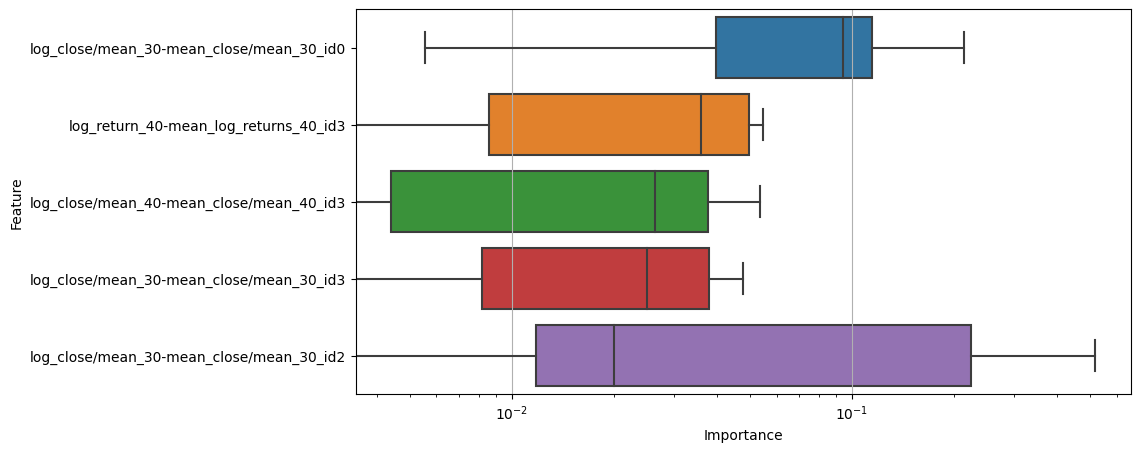

OOF corr score of akbank (ID=0) is 0.15187


Training model for halkbank (ID=1     )
entering time series cross validation loop
doing split 1 out of 7
number of train data: 2265
number of val data:   450


C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	tr's rmse: 0.0332924	tr's corr: 0.264896	vl's rmse: 0.026846	vl's corr: -0.137129
Evaluated only: rmse
Trained model was saved to 'trained_model_id1_fold0.pkl'

doing split 2 out of 7
number of train data: 905
number of val data:   450
Training until validation scores don't improve for 50 rounds
[100]	tr's rmse: 0.0194056	tr's corr: 0.478448	vl's rmse: 0.0290608	vl's corr: 0.370042
[200]	tr's rmse: 0.0189767	tr's corr: 0.497542	vl's rmse: 0.0289315	vl's corr: 0.371669


C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Early stopping, best iteration is:
[229]	tr's rmse: 0.0188963	tr's corr: 0.502392	vl's rmse: 0.0289144	vl's corr: 0.370092
Evaluated only: rmse
Trained model was saved to 'trained_model_id1_fold1.pkl'

doing split 3 out of 7
number of train data: 1342
number of val data:   450
Training until validation scores don't improve for 50 rounds


C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	tr's rmse: 0.0220116	tr's corr: 0.415478	vl's rmse: 0.035539	vl's corr: 0.18698
Early stopping, best iteration is:
[115]	tr's rmse: 0.0219231	tr's corr: 0.421473	vl's rmse: 0.0355272	vl's corr: 0.187843
Evaluated only: rmse
Trained model was saved to 'trained_model_id1_fold2.pkl'

doing split 4 out of 7
number of train data: 890
number of val data:   450
Training until validation scores don't improve for 50 rounds
[100]	tr's rmse: 0.0220053	tr's corr: 0.408292	vl's rmse: 0.0485239	vl's corr: 0.256659
[200]	tr's rmse: 0.0216498	tr's corr: 0.423474	vl's rmse: 0.0483858	vl's corr: 0.247243


C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[300]	tr's rmse: 0.0214357	tr's corr: 0.434051	vl's rmse: 0.0483152	vl's corr: 0.242078
[400]	tr's rmse: 0.0212992	tr's corr: 0.443497	vl's rmse: 0.0482928	vl's corr: 0.239079
[500]	tr's rmse: 0.0211554	tr's corr: 0.454319	vl's rmse: 0.0482713	vl's corr: 0.235107
Early stopping, best iteration is:
[489]	tr's rmse: 0.0211676	tr's corr: 0.452898	vl's rmse: 0.0482676	vl's corr: 0.235742
Evaluated only: rmse
Trained model was saved to 'trained_model_id1_fold3.pkl'

doing split 5 out of 7
number of train data: 890
number of val data:   450
Training until validation scores don't improve for 50 rounds
[100]	tr's rmse: 0.0220053	tr's corr: 0.408292	vl's rmse: 0.0190166	vl's corr: 0.433105
[200]	tr's rmse: 0.0216498	tr's corr: 0.423474	vl's rmse: 0.0187323	vl's corr: 0.440182


C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[300]	tr's rmse: 0.0214357	tr's corr: 0.434051	vl's rmse: 0.0185882	vl's corr: 0.438169
[400]	tr's rmse: 0.0212992	tr's corr: 0.443497	vl's rmse: 0.018542	vl's corr: 0.436788
[500]	tr's rmse: 0.0211554	tr's corr: 0.454319	vl's rmse: 0.0184823	vl's corr: 0.435669
[600]	tr's rmse: 0.0210604	tr's corr: 0.463493	vl's rmse: 0.0184691	vl's corr: 0.433182
[700]	tr's rmse: 0.0209977	tr's corr: 0.46767	vl's rmse: 0.0184652	vl's corr: 0.431813
Early stopping, best iteration is:
[662]	tr's rmse: 0.0210281	tr's corr: 0.465447	vl's rmse: 0.0184638	vl's corr: 0.432463
Evaluated only: rmse
Trained model was saved to 'trained_model_id1_fold4.pkl'

doing split 6 out of 7
number of train data: 1344
number of val data:   450
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[20]	tr's rmse: 0.0267139	tr's corr: 0.323856	vl's rmse: 0.0178991	vl's corr: 0.265921
Evaluated only: rmse
Trained model was saved to 'trained_model_id1_fold5.pkl'



C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


doing split 7 out of 7
number of train data: 1344
number of val data:   455
Training until validation scores don't improve for 50 rounds
[100]	tr's rmse: 0.0258895	tr's corr: 0.375583	vl's rmse: 0.0236739	vl's corr: 0.394476
Early stopping, best iteration is:
[76]	tr's rmse: 0.026073	tr's corr: 0.361151	vl's rmse: 0.0236468	vl's corr: 0.395779
Evaluated only: rmse
Trained model was saved to 'trained_model_id1_fold6.pkl'



C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


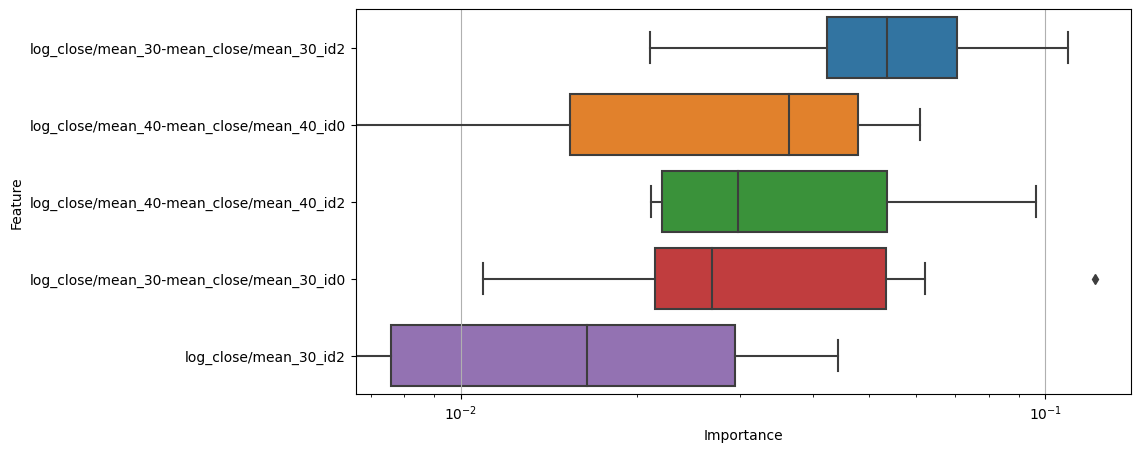

OOF corr score of halkbank (ID=1) is 0.21449


Training model for isbank (ID=2     )
entering time series cross validation loop
doing split 1 out of 7
number of train data: 2265
number of val data:   450
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[14]	tr's rmse: 0.0181029	tr's corr: 0.15925	vl's rmse: 0.0244419	vl's corr: 0.0514062
Evaluated only: rmse
Trained model was saved to 'trained_model_id2_fold0.pkl'



C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\hazre\AppData\Local\Temp\ipykernel_10672\1952138454.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  corr = cov / np.sqrt(var_a * var_b)


doing split 2 out of 7
number of train data: 905
number of val data:   450
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	tr's rmse: 0.0188256	tr's corr: 0.146657	vl's rmse: 0.0260812	vl's corr: -0.0374464
Evaluated only: rmse
Trained model was saved to 'trained_model_id2_fold1.pkl'



C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


doing split 3 out of 7
number of train data: 1342
number of val data:   450
Training until validation scores don't improve for 50 rounds
[100]	tr's rmse: 0.0234451	tr's corr: 0.244448	vl's rmse: 0.017908	vl's corr: 0.117167
Early stopping, best iteration is:
[60]	tr's rmse: 0.0235306	tr's corr: 0.222621	vl's rmse: 0.0179029	vl's corr: 0.122882
Evaluated only: rmse
Trained model was saved to 'trained_model_id2_fold2.pkl'



C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


doing split 4 out of 7
number of train data: 890
number of val data:   450
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	tr's rmse: 0.0253235	tr's corr: 0.133578	vl's rmse: 0.0190904	vl's corr: -0.0857554
Evaluated only: rmse
Trained model was saved to 'trained_model_id2_fold3.pkl'



C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


doing split 5 out of 7
number of train data: 890
number of val data:   450
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[11]	tr's rmse: 0.0252796	tr's corr: 0.223342	vl's rmse: 0.0157288	vl's corr: 0.0483002
Evaluated only: rmse
Trained model was saved to 'trained_model_id2_fold4.pkl'



C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


doing split 6 out of 7
number of train data: 1344
number of val data:   450
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	tr's rmse: 0.0231173	tr's corr: 0.134188	vl's rmse: 0.0166946	vl's corr: 0.0105852
Evaluated only: rmse
Trained model was saved to 'trained_model_id2_fold5.pkl'



C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


doing split 7 out of 7
number of train data: 1344
number of val data:   455
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[4]	tr's rmse: 0.0231033	tr's corr: 0.171557	vl's rmse: 0.0207284	vl's corr: 0.0431707
Evaluated only: rmse
Trained model was saved to 'trained_model_id2_fold6.pkl'



C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


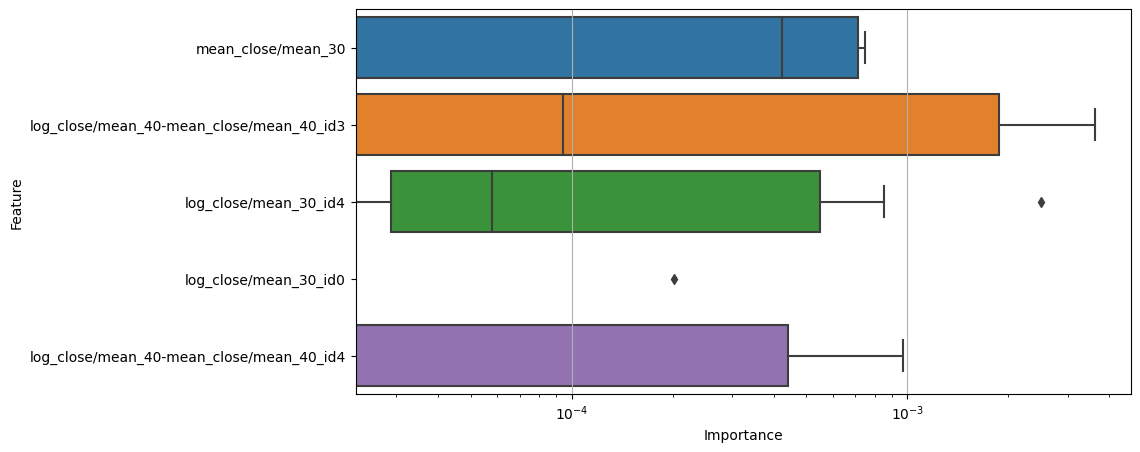

OOF corr score of isbank (ID=2) is 0.04048


Training model for garanti (ID=3     )
entering time series cross validation loop
doing split 1 out of 7
number of train data: 2265
number of val data:   450


C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 50 rounds
[100]	tr's rmse: 0.0400373	tr's corr: 0.523202	vl's rmse: 0.058411	vl's corr: 0.184362
Early stopping, best iteration is:
[106]	tr's rmse: 0.0398796	tr's corr: 0.52801	vl's rmse: 0.0583883	vl's corr: 0.186068
Evaluated only: rmse
Trained model was saved to 'trained_model_id3_fold0.pkl'

doing split 2 out of 7
number of train data: 905
number of val data:   450
Training until validation scores don't improve for 50 rounds
[100]	tr's rmse: 0.0315608	tr's corr: 0.601613	vl's rmse: 0.0531707	vl's corr: 0.471138


C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	tr's rmse: 0.0299766	tr's corr: 0.633181	vl's rmse: 0.0522899	vl's corr: 0.481485
[300]	tr's rmse: 0.0291153	tr's corr: 0.655172	vl's rmse: 0.0519121	vl's corr: 0.490402
[400]	tr's rmse: 0.0285446	tr's corr: 0.668333	vl's rmse: 0.0516831	vl's corr: 0.49447
[500]	tr's rmse: 0.0281901	tr's corr: 0.676836	vl's rmse: 0.0515517	vl's corr: 0.498886
[600]	tr's rmse: 0.0278867	tr's corr: 0.685487	vl's rmse: 0.0514799	vl's corr: 0.499637
[700]	tr's rmse: 0.0276351	tr's corr: 0.691581	vl's rmse: 0.051399	vl's corr: 0.502197
[800]	tr's rmse: 0.0274052	tr's corr: 0.698102	vl's rmse: 0.0513268	vl's corr: 0.504023
[900]	tr's rmse: 0.027173	tr's corr: 0.704663	vl's rmse: 0.0512569	vl's corr: 0.505364
[1000]	tr's rmse: 0.0269848	tr's corr: 0.710039	vl's rmse: 0.0512096	vl's corr: 0.506513
Early stopping, best iteration is:
[1040]	tr's rmse: 0.026914	tr's corr: 0.711868	vl's rmse: 0.0511776	vl's corr: 0.50782
Evaluated only: rmse
Trained model was saved to 'trained_model_id3_fold1.pkl'

doing spl

C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 50 rounds
[100]	tr's rmse: 0.0425944	tr's corr: 0.502862	vl's rmse: 0.0394433	vl's corr: 0.277329
Early stopping, best iteration is:
[64]	tr's rmse: 0.0436105	tr's corr: 0.480788	vl's rmse: 0.0391973	vl's corr: 0.270718
Evaluated only: rmse
Trained model was saved to 'trained_model_id3_fold2.pkl'

doing split 4 out of 7
number of train data: 890
number of val data:   450
Training until validation scores don't improve for 50 rounds
[100]	tr's rmse: 0.0454111	tr's corr: 0.490921	vl's rmse: 0.0479773	vl's corr: 0.285436


C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Early stopping, best iteration is:
[110]	tr's rmse: 0.0452423	tr's corr: 0.494128	vl's rmse: 0.0479351	vl's corr: 0.286502
Evaluated only: rmse
Trained model was saved to 'trained_model_id3_fold3.pkl'

doing split 5 out of 7
number of train data: 890
number of val data:   450


C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 50 rounds
[100]	tr's rmse: 0.0454111	tr's corr: 0.490921	vl's rmse: 0.0352527	vl's corr: 0.459209
[200]	tr's rmse: 0.0438678	tr's corr: 0.527741	vl's rmse: 0.0348225	vl's corr: 0.463773
[300]	tr's rmse: 0.0429963	tr's corr: 0.552297	vl's rmse: 0.0348725	vl's corr: 0.466741
[400]	tr's rmse: 0.0422325	tr's corr: 0.575154	vl's rmse: 0.0346552	vl's corr: 0.473392
Early stopping, best iteration is:
[404]	tr's rmse: 0.0422016	tr's corr: 0.576205	vl's rmse: 0.0346201	vl's corr: 0.473769
Evaluated only: rmse
Trained model was saved to 'trained_model_id3_fold4.pkl'

doing split 6 out of 7
number of train data: 1344
number of val data:   450
Training until validation scores don't improve for 50 rounds
[100]	tr's rmse: 0.0473748	tr's corr: 0.474276	vl's rmse: 0.0294122	vl's corr: 0.465291
Early stopping, best iteration is:
[80]	tr's rmse: 0.0479106	tr's corr: 0.457077	vl's rmse: 0.0291922	vl's corr: 0.467984
Evaluated only: rmse
Trained model was

C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


doing split 7 out of 7
number of train data: 1344
number of val data:   455
Training until validation scores don't improve for 50 rounds
[100]	tr's rmse: 0.0473748	tr's corr: 0.474276	vl's rmse: 0.0386751	vl's corr: 0.512406


C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Early stopping, best iteration is:
[116]	tr's rmse: 0.0470797	tr's corr: 0.480671	vl's rmse: 0.0385789	vl's corr: 0.513587
Evaluated only: rmse
Trained model was saved to 'trained_model_id3_fold6.pkl'



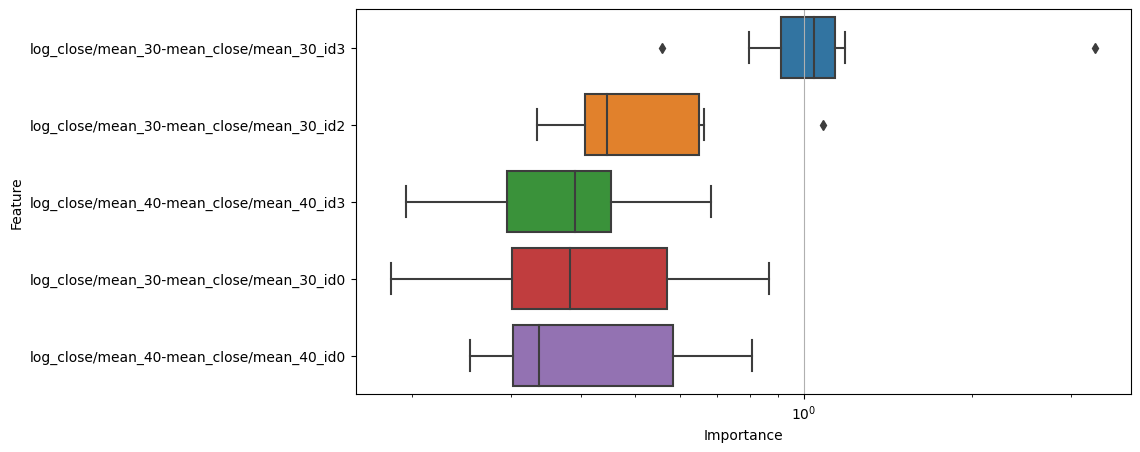

OOF corr score of garanti (ID=3) is 0.34988


Training model for ypkredi (ID=4     )
entering time series cross validation loop
doing split 1 out of 7
number of train data: 2265
number of val data:   450


C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[1]	tr's rmse: 0.0165861	tr's corr: 0.308858	vl's rmse: 0.0237966	vl's corr: -0.022529
Evaluated only: rmse
Trained model was saved to 'trained_model_id4_fold0.pkl'

doing split 2 out of 7
number of train data: 905
number of val data:   450
Training until validation scores don't improve for 50 rounds
[100]	tr's rmse: 0.0127883	tr's corr: 0.474424	vl's rmse: 0.0217781	vl's corr: 0.335519
[200]	tr's rmse: 0.0126033	tr's corr: 0.484374	vl's rmse: 0.0217379	vl's corr: 0.322847
Early stopping, best iteration is:
[194]	tr's rmse: 0.0126102	tr's corr: 0.483601	vl's rmse: 0.021729	vl's corr: 0.325567
Evaluated only: rmse
Trained model was saved to 'trained_model_id4_fold1.pkl'



C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


doing split 3 out of 7
number of train data: 1342
number of val data:   450
Training until validation scores don't improve for 50 rounds
[100]	tr's rmse: 0.0181026	tr's corr: 0.375873	vl's rmse: 0.0129418	vl's corr: 0.376894


C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	tr's rmse: 0.0178327	tr's corr: 0.394778	vl's rmse: 0.0128235	vl's corr: 0.383258
[300]	tr's rmse: 0.0176993	tr's corr: 0.406981	vl's rmse: 0.0127963	vl's corr: 0.384538
Early stopping, best iteration is:
[343]	tr's rmse: 0.0176472	tr's corr: 0.413218	vl's rmse: 0.0127851	vl's corr: 0.387501
Evaluated only: rmse
Trained model was saved to 'trained_model_id4_fold2.pkl'

doing split 4 out of 7
number of train data: 890
number of val data:   450


C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 50 rounds
[100]	tr's rmse: 0.0197575	tr's corr: 0.398047	vl's rmse: 0.0165624	vl's corr: 0.395829
[200]	tr's rmse: 0.0194543	tr's corr: 0.411729	vl's rmse: 0.0163056	vl's corr: 0.410585
[300]	tr's rmse: 0.0192595	tr's corr: 0.424338	vl's rmse: 0.0161881	vl's corr: 0.409407
[400]	tr's rmse: 0.0191378	tr's corr: 0.43416	vl's rmse: 0.0161433	vl's corr: 0.409651
[500]	tr's rmse: 0.0190493	tr's corr: 0.441704	vl's rmse: 0.0160927	vl's corr: 0.413791
[600]	tr's rmse: 0.0189868	tr's corr: 0.445549	vl's rmse: 0.0160598	vl's corr: 0.415343
[700]	tr's rmse: 0.0189374	tr's corr: 0.450211	vl's rmse: 0.0160451	vl's corr: 0.414839
Early stopping, best iteration is:
[713]	tr's rmse: 0.0189328	tr's corr: 0.450792	vl's rmse: 0.0160391	vl's corr: 0.415724
Evaluated only: rmse
Trained model was saved to 'trained_model_id4_fold3.pkl'

doing split 5 out of 7
number of train data: 890
number of val data:   450
Training until validation scores don't improve 

C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	tr's rmse: 0.0194543	tr's corr: 0.411729	vl's rmse: 0.0158669	vl's corr: 0.204696
Early stopping, best iteration is:
[240]	tr's rmse: 0.0193695	tr's corr: 0.41618	vl's rmse: 0.015846	vl's corr: 0.209694
Evaluated only: rmse
Trained model was saved to 'trained_model_id4_fold4.pkl'

doing split 6 out of 7
number of train data: 1344
number of val data:   450
Training until validation scores don't improve for 50 rounds
[100]	tr's rmse: 0.0190961	tr's corr: 0.416904	vl's rmse: 0.012412	vl's corr: 0.338342


C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Early stopping, best iteration is:
[80]	tr's rmse: 0.0192239	tr's corr: 0.410395	vl's rmse: 0.0122689	vl's corr: 0.350801
Evaluated only: rmse
Trained model was saved to 'trained_model_id4_fold5.pkl'

doing split 7 out of 7
number of train data: 1344
number of val data:   455
Training until validation scores don't improve for 50 rounds
[100]	tr's rmse: 0.0190961	tr's corr: 0.416904	vl's rmse: 0.0149535	vl's corr: 0.264565


C:\Users\hazre\anaconda3\envs\yolov7\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Early stopping, best iteration is:
[81]	tr's rmse: 0.0192189	tr's corr: 0.411063	vl's rmse: 0.0148391	vl's corr: 0.277642
Evaluated only: rmse
Trained model was saved to 'trained_model_id4_fold6.pkl'



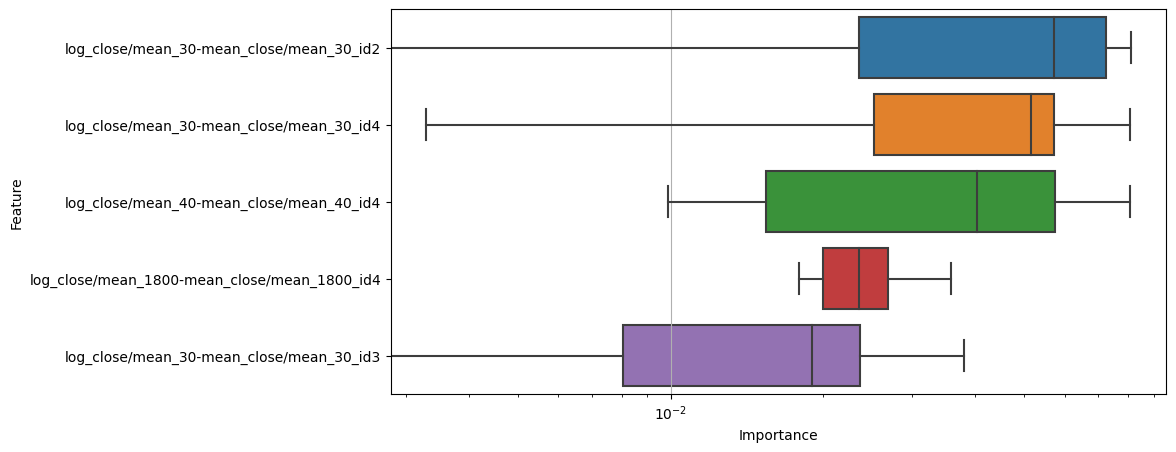

OOF corr score of ypkredi (ID=4) is 0.26984




In [61]:
oof = [ [] for id in range(5)   ]

all_oof_pred = []
all_oof_valid = []
all_oof_weight = []
asset_ids = [0,1,2,3,4]
asset_names = ["akbank","halkbank","isbank","garanti","ypkredi"]

for asset_id  in asset_ids:
    print(f"Training model for {asset_names[asset_id]:<6} (ID={asset_id:<6})")
    
    oof_pred, oof_valid = get_Xy_and_model_for_asset(df, asset_id)
        
    all_oof_pred += oof_pred
    all_oof_valid += oof_valid
    
    oof[asset_id] = corr_score(     np.array(oof_pred)   ,    np.array(oof_valid)    )
    
    print(f'OOF corr score of {asset_names[asset_id]} (ID={asset_id}) is {oof[asset_id]:.5f}')
    print('')
    print('')



In [82]:
data = df

In [62]:
df

,timestamp,Close_0,Close_1,Close_2,Close_3,Close_4,Target_0,Target_1,Target_2,Target_3,...,log_close/mean_1800-mean_close/mean_1800_id0,log_return_1800-mean_log_returns_1800_id0,log_close/mean_1800-mean_close/mean_1800_id1,log_return_1800-mean_log_returns_1800_id1,log_close/mean_1800-mean_close/mean_1800_id2,log_return_1800-mean_log_returns_1800_id2,log_close/mean_1800-mean_close/mean_1800_id3,log_return_1800-mean_log_returns_1800_id3,log_close/mean_1800-mean_close/mean_1800_id4,log_return_1800-mean_log_returns_1800_id4
0,1673508600,16.410000,10.35,10.66,24.440001,8.87,0.020000,0.02,0.010000,0.039999,...,0.221837,0.031387,-0.239068,-0.087854,-0.209556,0.015579,0.620167,0.048714,-0.393380,-0.007826
1,1673508660,16.430000,10.37,10.67,24.480000,8.88,0.039999,0.02,0.030000,0.060001,...,0.221685,0.032808,-0.238507,-0.087447,-0.209988,0.013251,0.620432,0.049612,-0.393622,-0.008223
2,1673508720,16.469999,10.39,10.70,24.540001,8.90,-0.010000,0.02,-0.020000,0.000000,...,0.221744,0.031758,-0.238953,-0.088192,-0.209553,0.013448,0.620508,0.049366,-0.393746,-0.006380
3,1673508780,16.459999,10.41,10.68,24.540001,8.88,0.050001,0.02,0.040000,0.080000,...,0.221697,0.032695,-0.236469,-0.085301,-0.210863,0.009935,0.621069,0.050333,-0.395434,-0.007662
4,1673508840,16.510000,10.43,10.72,24.620001,8.91,0.000000,0.00,0.000000,0.000000,...,0.221667,0.029360,-0.237613,-0.085485,-0.210188,0.011628,0.621260,0.050674,-0.395125,-0.006176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,1674226620,18.740000,12.43,12.32,26.780001,10.15,-0.020000,-0.01,-0.009999,-0.020000,...,0.016420,0.026669,-0.019532,-0.038195,0.014181,0.021620,-0.002601,0.003541,-0.008468,-0.013634
3151,1674226680,18.719999,12.42,12.31,26.760000,10.15,0.010000,-0.04,0.000000,-0.020000,...,0.016023,0.027130,-0.019628,-0.039191,0.014043,0.021484,-0.002664,0.003386,-0.007774,-0.012809
3152,1674226740,18.730000,12.38,12.31,26.740000,10.19,-0.020000,-0.04,-0.020000,0.000000,...,0.016443,0.026797,-0.022928,-0.043284,0.013932,0.020617,-0.003511,0.002556,-0.003936,-0.006686
3153,1674227100,18.709999,12.34,12.29,26.740000,10.18,0.000000,0.00,0.000000,0.160000,...,0.016742,0.026223,-0.024756,-0.045216,0.013676,0.022093,-0.002131,0.003051,-0.003532,-0.006152
